This code was written for a homework assignment. Our setup is as follows:

$(\theta_1, \theta_2)$ are such that $\theta_i \in \mathbb{R}^2$, $\theta_i \geq 0$, and $\|\theta_i\| \leq 1$. 

Define random variables $X_i$ where $\Pr[X_i = \theta_1] = \tfrac{1}{2} = \Pr[X_i = \theta_2].$ 

Define the matrix $P \in \mathbb{R}^{n \times n}$ where each $(i,j)$-th entry $P_{i,j}$ is given by $X_i^\top X_j$, then $0 \leq P_{i,j} \leq 1$ for all $i,j$. 

Define matrix $A \in \{0,1\}^{n \times n}$ where $
A_{i,j} = \begin{cases}
    \text{Bernoulli}(P_{i,j}) & \text{if } i \leq j, \\
    A_{j,i} & \text{if } i > j.
\end{cases}
$

Let $\theta_1 = (0.5, 0.5)^T$ and $\theta_2 = (\sqrt{0.001}, \sqrt{0.499})$, $\hat{\mu_1}, \hat{\mu_2}$ be the leading eigenvalues, and $\lambda_1, \lambda_2$ be the leading eigenvectors of $A$. Define $\hat{X}$ as the matrix $\hat{\mu_1} \sqrt{\lambda_1}, \hat{\mu_2} \sqrt{\lambda_2} \in \mathbb{R}^{n \times 2}$. The plot below is of the rows of $\hat{X}$.

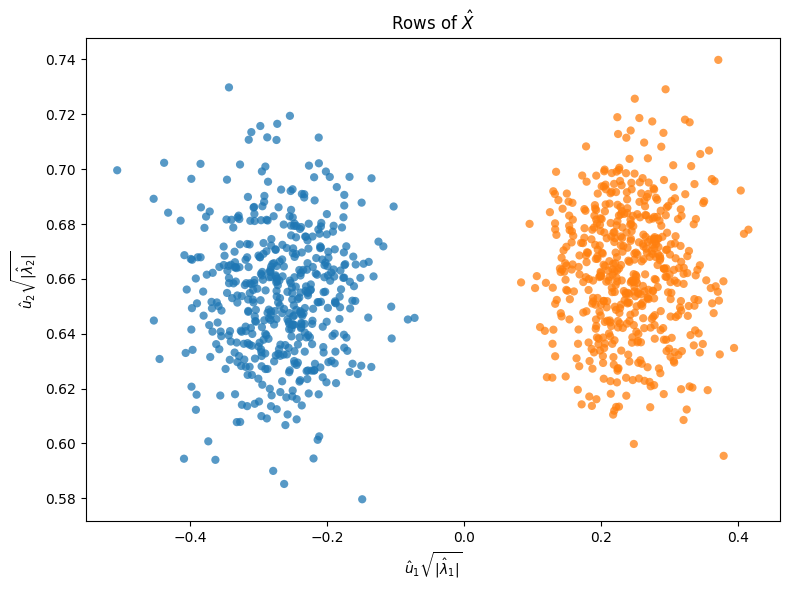

In [47]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(50)

# parameters
n = 1000
theta_1 = np.array([0.5, 0.5])
theta_2 = np.array([np.sqrt(0.001), np.sqrt(0.499)])

# latent labels Y_i (0 -> theta_1, 1 -> theta_2)
Y = np.random.choice([0, 1], size=n)
X = np.where(Y[:, None] == 0, theta_1, theta_2)   # rows are θ1 or θ2

P = X @ X.T

# sample
A = np.triu(np.random.binomial(1, P), k=1)
A = A + A.T

# eigen-decomposition of A (these are already sorted in ascending order)
eigvals, eigvecs = np.linalg.eigh(A)
Lambda_top = eigvals[-2:]
U_top = eigvecs[:, -2:]

X_hat = U_top * np.sqrt(np.abs(Lambda_top))

# plot
colors = np.where(Y == 0, 'tab:blue', 'tab:orange')

plt.figure(figsize=(8, 6))
plt.scatter(X_hat[:, 0], X_hat[:, 1], c=colors, alpha=0.75, s=35, edgecolor='none')
plt.xlabel(r'$\hat u_1 \sqrt{|\hat\lambda_1|}$')
plt.ylabel(r'$\hat u_2 \sqrt{|\hat\lambda_2|}$')
plt.title(r'Rows of $\hat{X}$')
plt.tight_layout()
plt.show()

We are able to recover some geometric information about the latent structure. This works better when a) $\theta_1$ and $\theta_2$ are 'similar', and b) $n$ is large.

In general, this setup is used to describe $\textbf{Random Dot Product Graphs}$. These models can approximate a wide range of graphs. Roughly, the nodes are latent vectors and the edges are probabilistically generated using the dot product of the latent vectors.